#### Use breast cancer dataset, build classification model using k-nn classifier for predicting whether a person suffers from cancer or not. Find the best value of ‘k’ for breast cancer dataset. Evaluate the performance of your model for different ‘k’ values.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
X = data.drop(['diagnosis','Unnamed: 32'], axis=1)
y = data['diagnosis']

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components=3, random_state=1)
X_pcs = pca.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pcs, y, test_size=0.2, random_state=0)

In [9]:
knn = KNeighborsClassifier(n_jobs=-1)
skf = KFold(n_splits=4, shuffle=True, random_state=42)
params = {'n_neighbors':np.arange(3,21,2),
         'leaf_size': list(range(1,10)),
         'p': [1,2]}

gs = GridSearchCV(estimator=knn, param_grid=params, scoring='f1_weighted', cv=skf)

In [10]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'p': [1, 2]},
             scoring='f1_weighted')

In [11]:
print(gs.best_estimator_)
print(gs.best_score_)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=9)
0.9488740410388768


In [12]:
k = list(range(3,17,2))
scores_train = []
scores_cv = []

for i in k:
    _knn = KNeighborsClassifier(n_neighbors=i)
    _knn.fit(X_train, y_train)
    _y_pred_train = _knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, _y_pred_train)
    _score_cv = cross_val_score(_knn, X_train, y_train, scoring='f1_weighted', cv=4).mean()
    
    scores_train.append(train_accuracy)
    scores_cv.append(_score_cv)

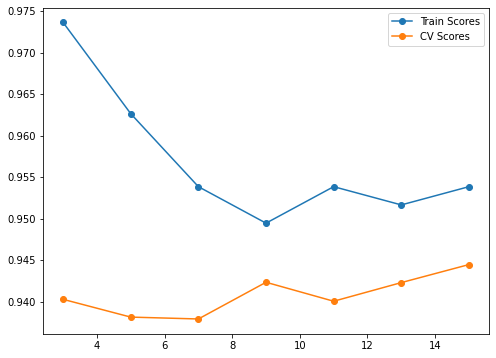

In [13]:
plt.figure(figsize=(8,6))
plt.plot(k, scores_train, marker='o',label='Train Scores')
plt.plot(k, scores_cv, marker='o', label='CV Scores')
plt.legend()
plt.show()

## We can see that both graph and GridSearch suggest n_neighbors=9

In [14]:
y_pred_test = gs.predict(X_test)
y_pred_train = gs.predict(X_train)

In [15]:
print('F1 Score(Train): ', f1_score(y_train, y_pred_train, average='micro'))
print('F1 Score(Test): ', f1_score(y_test, y_pred_test, average='micro'))

print('\nAccuracy Score(Train): ', accuracy_score(y_train, y_pred_train))
print('Accuracy Score(Test): ', accuracy_score(y_test, y_pred_test))

F1 Score(Train):  0.9494505494505493
F1 Score(Test):  0.9122807017543859

Accuracy Score(Train):  0.9494505494505494
Accuracy Score(Test):  0.9122807017543859
